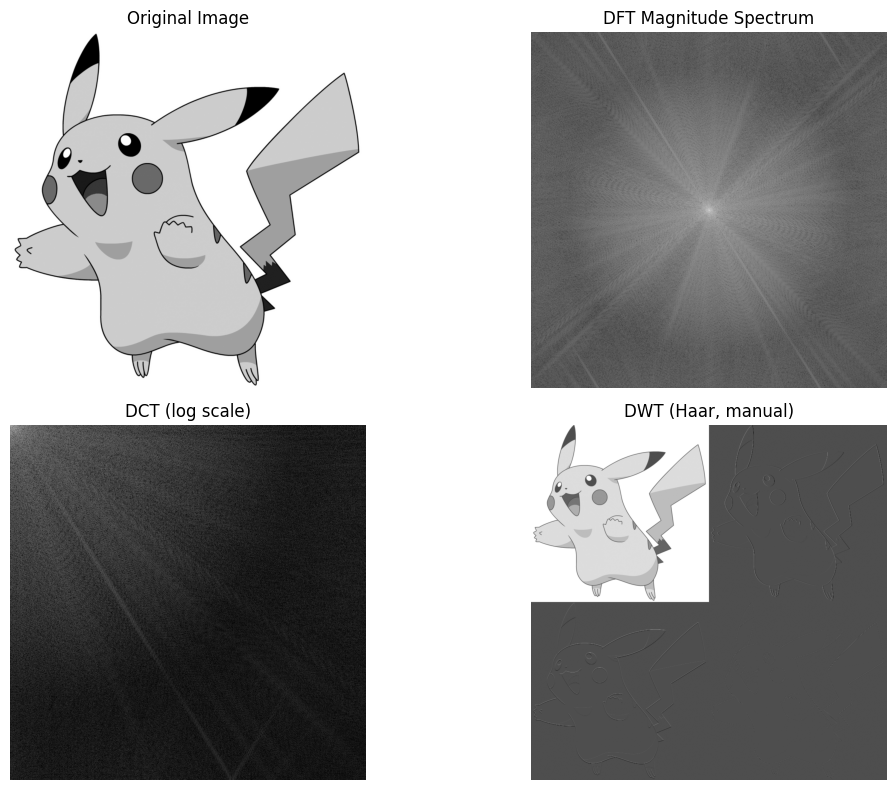

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
img = cv2.imread('../images/img7.png', cv2.IMREAD_GRAYSCALE)
img = np.float32(img)

# Crop to even dimensions
rows, cols = img.shape
img = img[:rows//2*2, :cols//2*2]

# -------------------- DFT --------------------
dft = cv2.dft(img, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)

# -------------------- DCT --------------------
dct = cv2.dct(img)
dct_log = np.log(np.abs(dct) + 1)

# -------------------- DWT (manual Haar) --------------------
def haar_dwt2(image):
    rows, cols = image.shape
    output = np.zeros_like(image)
    
    # Process rows
    for i in range(rows):
        row = image[i, :]
        row_low = (row[::2] + row[1::2]) / 2
        row_high = (row[::2] - row[1::2]) / 2
        output[i, :cols//2] = row_low
        output[i, cols//2:] = row_high
    
    temp = np.copy(output)
    # Process columns
    for j in range(cols):
        col = temp[:, j]
        col_low = (col[::2] + col[1::2]) / 2
        col_high = (col[::2] - col[1::2]) / 2
        output[:rows//2, j] = col_low
        output[rows//2:, j] = col_high
    
    return output

dwt_manual = haar_dwt2(img)

# -------------------- Plot --------------------
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('DFT Magnitude Spectrum')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(dct_log, cmap='gray')
plt.title('DCT (log scale)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(dwt_manual, cmap='gray')
plt.title('DWT (Haar, manual)')
plt.axis('off')

plt.tight_layout()
plt.savefig('transforms.png')
plt.show()
